<head><link rel="stylesheet" href="../../../../cssthemes/github.css"><meta name="viewport" content="initial-scale=1, width=device-width"></head>

In [1]:
import sysprint(sys.executable)import ps2import mathfrom random import randintfrom ps2_verify_movement37 import testRobotMovementimport ps2_visualizeimport pylabimport inspect

/home/jcmint/anaconda3/envs/learningenv/bin/python


# Robot cleaning simulationsI import the classes from ps2.py, including Position, RectangularRoom, Robot (and its subclasses StandardRobot and RandomWalkRobot). Nothing too complex here, just a hacky way of dealing with storing robot positions in a room represented as a NumPy Array.## Classes in Action

In [2]:
loc = ps2.Position(2, 2)bad_loc = ps2.Position(10, 10)room = ps2.RectangularRoom(6, 8)print(room.isPositionInRoom(loc))print(room.isPositionInRoom(bad_loc))

True
False


The robot is initialized in the 6 x 8 room with a set movement speed and at a random location. Upon initialization the tile it is on is marked as clean (so it starts out with one clean tile before moving). Then, moving again, it updates the position and the number of cleaned tiles.

In [3]:
robot = ps2.StandardRobot(room, 1)print(robot.getRobotPosition())print(robot.room.getNumCleanedTiles())robot.updatePositionAndClean()print(robot.getRobotPosition())print(robot.room.getNumCleanedTiles())

(1.00, 4.00)
1
(0.28, 4.69)
2


The runSimulation function has args of the number of robots, speed, width, height, clean threshold and number of trials. The robots are initialized and trials are run until a set percent of the room has been covered by the robot, counting the number of steps taken, and returning the average of these steps over a number of trials. Here, we see that a randomly walking robot will take much longer than a straight "bouncing" robot to clean a room.

In [4]:
print(ps2.runSimulation(1, 1.0, 10, 10, 0.9, 30, ps2.StandardRobot))print(ps2.runSimulation(1, 1.0, 10, 10, 0.9, 30, ps2.RandomWalkRobot))

240.13333333333333
614.1


Finally, we can run these trials for different combinations of the number of robots, or the aspect ratio (ratio of height to width), and see how many time steps it takes to clean the room. The second command hung up so I wasn't able to show all the data.

Plotting 1 robots...
Plotting 2 robots...
Plotting 3 robots...
Plotting 4 robots...
Plotting 5 robots...
Plotting 6 robots...
Plotting 7 robots...
Plotting 8 robots...
Plotting 9 robots...
Plotting 10 robots...


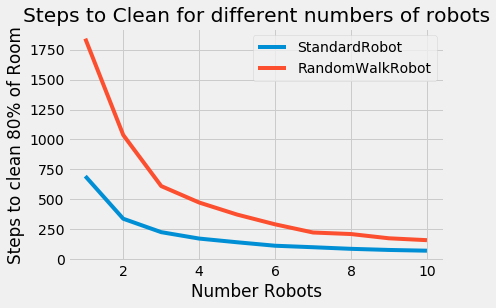

Plotting cleaning time for a room of width: 10 by height: 30
Plotting cleaning time for a room of width: 11 by height: 27
Plotting cleaning time for a room of width: 12 by height: 25
Plotting cleaning time for a room of width: 13 by height: 23
Plotting cleaning time for a room of width: 14 by height: 21
Plotting cleaning time for a room of width: 15 by height: 20
Plotting cleaning time for a room of width: 16 by height: 18
Plotting cleaning time for a room of width: 17 by height: 17


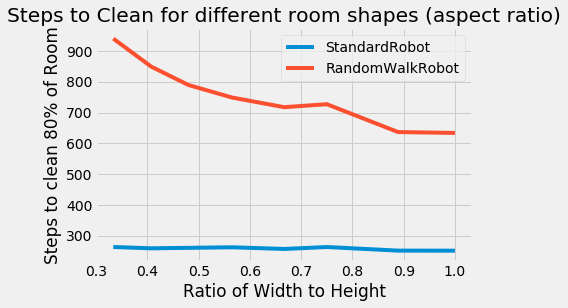

In [5]:
from matplotlib import stylestyle.use('fivethirtyeight')ps2.showPlot1("Steps to Clean for different numbers of robots", "Number Robots", "Steps to clean 80% of Room")ps2.showPlot2("Steps to Clean for different room shapes (aspect ratio)", "Ratio of Width to Height", "Steps to clean 80% of Room")

## AppendixPrint out RectangularRoom, Robot, StandardRobot, RandomWalkRobot, RunSimulation classes### RectangularRoom

In [1]:
class RectangularRoom(object):"""A RectangularRoom represents a rectangular region containing clean or dirtytiles.A room has a width and a height and contains (width * height) tiles. At anyparticular time, each of these tiles is either clean or dirty."""def __init__(self, width, height):# Create array to represent room, with all False valuesself.width = widthself.height = heightself.grid = np.zeros((height, width), dtype=bool)"""Initializes a rectangular room with the specified width and height.Initially, no tiles in the room have been cleaned.width: an integer > 0height: an integer > 0"""def cleanTileAtPosition(self, pos):(c, r) = math.floor(pos.getX()), math.floor(pos.getY())# adjust position which begins at 1, 1, to grid which begins at 0, 0# This is pretty hacky, but for some reason a position that passed the isPositionInRoom is out of bounds..if (0 <= pos.getY() < self.height) & (0 <= pos.getX() < self.width):self.grid[r - 1, c - 1] = True"""Mark the tile under the position POS as cleaned.Assumes that POS represents a valid position inside this room.pos: a Position"""# raise NotImplementedErrordef isTileCleaned(self, m, n):"""Return True if the tile (m, n) has been cleaned.Assumes that (m, n) represents a valid tile inside the room.m and n: integersreturns: True if (m, n) is cleaned, False otherwise"""return self.grid[n - 1, m - 1]# raise NotImplementedErrordef getNumTiles(self):return self.grid.shape[0] * self.grid.shape[1]# Return the total number of tiles in the room, returns: an integer# raise NotImplementedErrordef getNumCleanedTiles(self):return sum(sum(self.grid))# Return the total number of clean tiles in the room.# raise NotImplementedErrordef getRandomPosition(self):# Return a random position inside the room, returns: a Position object.# second element of shape is number of columns, representing x distance. adjust position# by subtracting one since that is done when adjusting math position to matrix positionrand_x, rand_y = randint(1, self.grid.shape[1]), randint(1, self.grid.shape[1])return Position(rand_x - 1, rand_y - 1)# raise NotImplementedErrordef isPositionInRoom(self, pos):"""Return True if pos is inside the room.pos: a Position object.returns: True if pos is in the room, False otherwise."""if (0 <= pos.getY() < self.height) & (0 <= pos.getX() < self.width):return Trueelse:return False

### Robot

In [2]:
class Robot(object):"""Represents a robot cleaning a particular room.At all times the robot has a particular position and direction in the room.The robot also has a fixed speed.Subclasses of Robot should provide movement strategies by implementingupdatePositionAndClean(), which simulates a single time-step."""def __init__(self, room, speed):"""Initializes a Robot with the given speed in the specified room. Therobot initially has a random direction and a random position in theroom. The robot cleans the tile it is on.room:  a RectangularRoom object.speed: a float (speed > 0)"""# A position object is stored as self attributeself.room = roomself.pos = self.room.getRandomPosition()self.room.cleanTileAtPosition(self.pos)self.angle = randint(0, 359)self.speed = speeddef getRobotPosition(self):"""Return the position of the robot.returns: a Position object giving the robot's position."""return self.posdef getRobotDirection(self):"""Return the direction of the robot.returns: an integer d giving the direction of the robot as an angle indegrees, 0 <= d < 360."""return self.angledef setRobotPosition(self, position):"""Set the position of the robot to POSITION.position: a Position object."""self.pos = positiondef setRobotDirection(self, direction):"""Set the direction of the robot to DIRECTION.direction: integer representing an angle in degrees"""self.angle = directiondef updatePositionAndClean(self):"""Simulate the passage of a single time-step.Move the robot to a new position and mark the tile it is on as havingbeen cleaned."""raise NotImplementedError # don't change this!

### StandardRobot

In [3]:
class StandardRobot(Robot):"""A StandardRobot is a Robot with the standard movement strategy.At each time-step, a StandardRobot attempts to move in its currentdirection; when it would hit a wall, it *instead* chooses a new directionrandomly."""def updatePositionAndClean(self):"""Simulate the passage of a single time-step.Move the robot to a new position and mark the tile it is on as havingbeen cleaned."""has_moved = Falsewhile not has_moved:new = self.pos.getNewPosition(self.angle, self.speed)if self.room.isPositionInRoom(new):self.setRobotPosition(new)self.room.cleanTileAtPosition(self.pos)has_moved = Trueelse:self.angle = randint(0, 359)

### RandomWalkRobot

In [4]:
class RandomWalkRobot(Robot):"""A RandomWalkRobot is a robot with the "random walk" movement strategy: itchooses a new direction at random at the end of each time-step."""def updatePositionAndClean(self):"""Simulate the passage of a single time-step.Move the robot to a new position and mark the tile it is on as havingbeen cleaned."""has_moved = Falsewhile not has_moved:self.angle = randint(0, 359)new = self.pos.getNewPosition(self.angle, self.speed)if self.room.isPositionInRoom(new):self.setRobotPosition(new)self.room.cleanTileAtPosition(self.pos)has_moved = True

### runSimulation

In [7]:
def runSimulation(num_robots, speed, width, height, min_coverage, num_trials,robot_type, toprint = False):"""Runs NUM_TRIALS trials of the simulation and returns the mean number oftime-steps needed to clean the fraction MIN_COVERAGE of the room.The simulation is run with NUM_ROBOTS robots of type ROBOT_TYPE, each withspeed SPEED, in a room of dimensions WIDTH x HEIGHT.num_robots: an int (num_robots > 0)speed: a float (speed > 0)width: an int (width > 0)height: an int (height > 0)min_coverage: a float (0 <= min_coverage <= 1.0)num_trials: an int (num_trials > 0)robot_type: class of robot to be instantiated (e.g. StandardRobot orRandomWalkRobot)"""results = [None] * num_trials# Run number of trials and keep track with results listfor trial in range(0, num_trials):my_room = RectangularRoom(width, height)my_bots = {}# Initialize robotsfor i in range(1, num_robots + 1):my_bots[i] = robot_type(my_room, speed)steps = 0while my_room.getNumCleanedTiles()/my_room.getNumTiles() < min_coverage:for bot in my_bots.values():bot.room = my_roombot.updatePositionAndClean()my_room = bot.roomsteps += 1if ((toprint) & (steps%100 == 0)):print("Took Step ", steps)results[trial] = stepsif toprint:print("Finished Trial: ", trial)return sum(results)/len(results)